In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression


In [127]:
crime_df = pd.read_csv("Crimes_-_2010_to_2023.csv")
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
0,7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
1,12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
2,12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
3,7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
4,7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"


In [128]:
print(crime_df.columns)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Logitude ',
       'Location'],
      dtype='object')


In [129]:
crime_df.drop(['Case Number', 'IUCR', 'Beat', 'District', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Location'], axis=1, inplace=True)
crime_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Logitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254343,13546357,7/29/24 14:50,079XX S CICERO AVE,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,18.0,2024,8/6/24 15:40,41.748060,-87.741303
254344,13551304,7/29/24 12:00,017XX W COLUMBIA AVE,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,49.0,2024,8/6/24 15:40,42.004380,-87.674446
254345,13546005,7/29/24 1:00,051XX S INDIANA AVE,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,3.0,2024,8/6/24 15:40,41.801297,-87.621007
254346,13552326,7/24/24 16:00,087XX S BEVERLY AVE,THEFT,OVER $500,APARTMENT,False,False,19.0,2024,8/6/24 15:40,41.734732,-87.671948


In [130]:
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6)
print(top_6_primary_types)

Primary Type
THEFT                  55862
BATTERY                42224
CRIMINAL DAMAGE        26437
MOTOR VEHICLE THEFT    22352
ASSAULT                21563
DECEPTIVE PRACTICE     17606
Name: count, dtype: int64


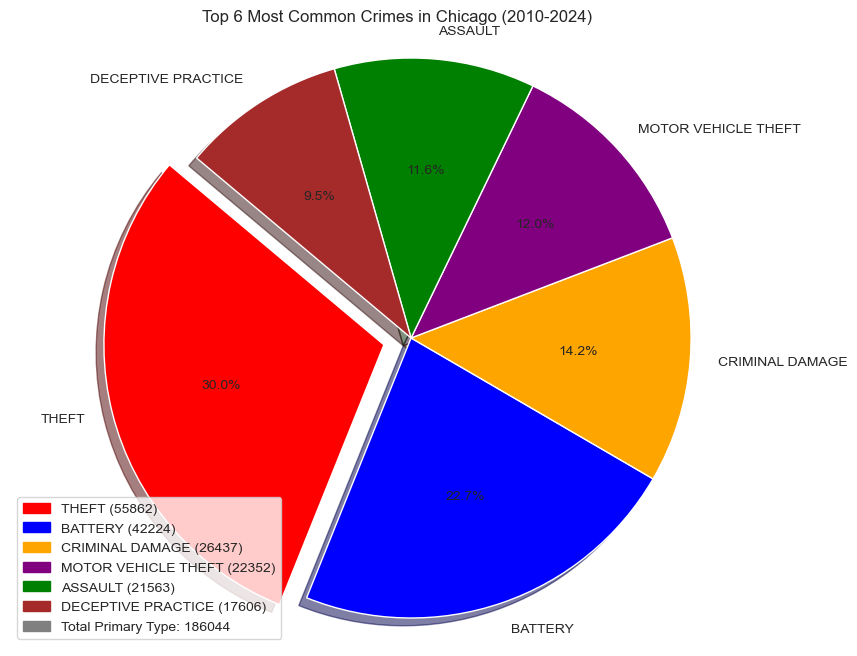

In [131]:
# Calculate the value counts for 'Primary Type' and get the top 6
crime_counts = crime_df['Primary Type'].value_counts().head(6)

# Calculate the sum total of the primary type counts
total_primary_type_counts = crime_counts.sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'orange', 'purple', 'green', 'brown']
explode = [0.1 if i == crime_counts.idxmax() else 0 for i in crime_counts.index]

plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Top 6 Most Common Crimes in Chicago (2010-2024)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with the actual numbers and the total count
patches = [Patch(color=colors[i], label=f"{crime_counts.index[i]} ({crime_counts.values[i]})") for i in range(len(crime_counts))]
patches.append(Patch(color='grey', label=f"Total Primary Type: {total_primary_type_counts}"))

plt.legend(handles=patches, loc='lower left')
plt.show()

In [132]:
# Ensure the 'Date' column is correctly parsed as datetime
crime_df['Date'] = pd.to_datetime(crime_df['Date'], errors='coerce')

# Extract the year from the 'Date' column
crime_df['Year'] = crime_df['Date'].dt.year

# Check the unique years in the dataset after extracting the year again
print("Unique years in the dataset after re-extracting the 'Year':")
print(crime_df['Year'].unique())

# Now proceed with the previous steps to analyze the data
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6).index

filtered_df = crime_df[(crime_df['Primary Type'].isin(top_6_primary_types)) & 
                       (crime_df['Year'].isin(range(2010, 2025)))]

print("\nFiltered data for the top 6 crime types from 2010-2024:")
print(filtered_df.head())
print(f"Number of records in filtered data: {len(filtered_df)}")


C:\Users\pot8o\AppData\Local\Temp\ipykernel_25288\365671132.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_df['Date'] = pd.to_datetime(crime_df['Date'], errors='coerce')


Unique years in the dataset after re-extracting the 'Year':
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024]

Filtered data for the top 6 crime types from 2010-2024:
          ID                Date                Block        Primary Type  \
15  13263907 2010-06-01 00:00:00   051XX S HARPER AVE  DECEPTIVE PRACTICE   
20  13299775 2010-12-01 12:40:00  114XX S EMERALD AVE  DECEPTIVE PRACTICE   
21  13301698 2010-01-01 23:50:00  082XX S CALUMET AVE  DECEPTIVE PRACTICE   
25  13312982 2010-06-22 00:01:00   085XX S RHODES AVE               THEFT   
30  11345276 2010-06-02 12:00:00  080XX S CHAPPEL AVE               THEFT   

                                Description Location Description  Arrest  \
15      FINANCIAL IDENTITY THEFT OVER $ 300      OTHER (SPECIFY)   False   
20      FINANCIAL IDENTITY THEFT OVER $ 300                  NaN   False   
21  FINANCIAL IDENTITY THEFT $300 AND UNDER            RESIDENCE   False   
25                                OVER

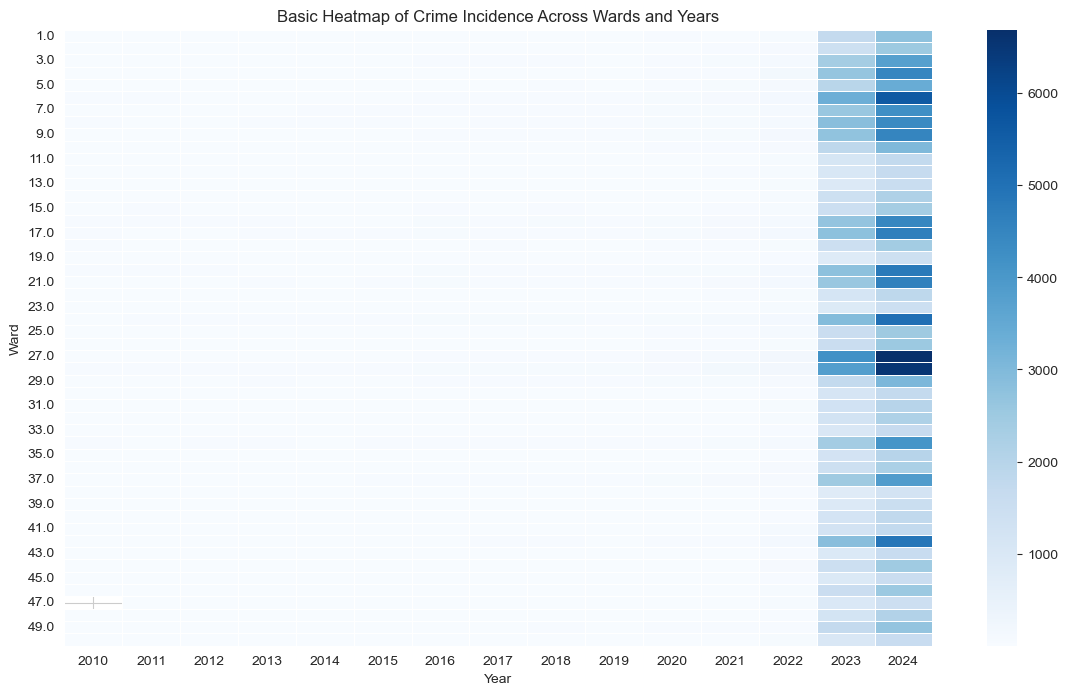

In [133]:
# Group by 'Ward' and 'Year' to count the number of crimes in each ward per year
ward_year_crime_counts = crime_df.groupby(['Ward', 'Year']).size().unstack()

# Create a basic heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(ward_year_crime_counts, cmap="Blues", linewidths=.5)

# Add title and labels
plt.title('Basic Heatmap of Crime Incidence Across Wards and Years')
plt.xlabel('Year')
plt.ylabel('Ward')

# Display the plot
plt.show()

In [134]:
ward_crime_counts = crime_df['Ward'].value_counts()
most_affected_wards = ward_crime_counts.head()
least_affected_wards = ward_crime_counts.tail()

print("Most Affected Wards:")
print(most_affected_wards)

print("\nLeast Affected Wards:")
print(least_affected_wards)

Most Affected Wards:
Ward
27.0    11585
28.0    11296
6.0      9569
24.0     8755
20.0     8206
Name: count, dtype: int64

Least Affected Wards:
Ward
39.0    2603
47.0    2565
23.0    2549
19.0    2465
38.0    2186
Name: count, dtype: int64


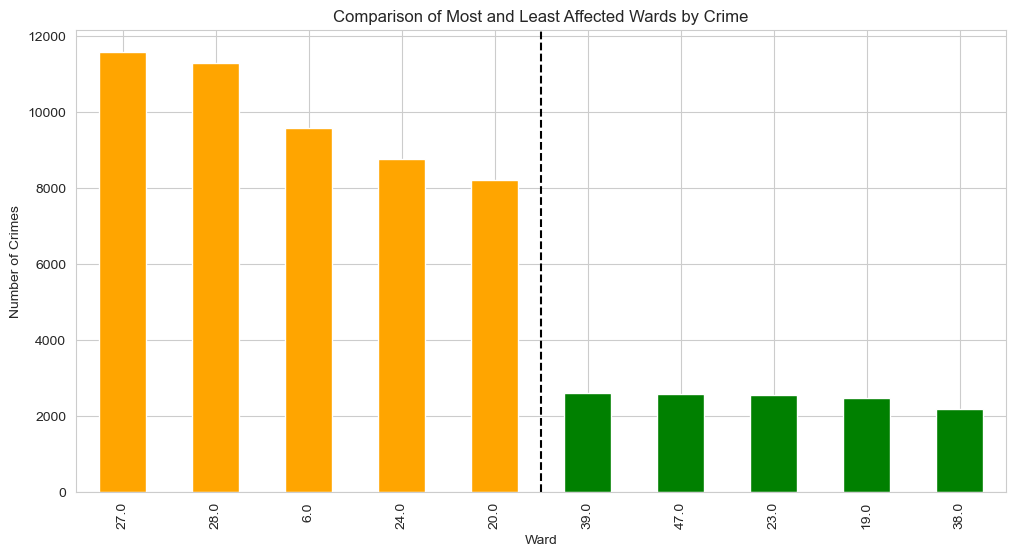

In [135]:
# Combine most affected and least affected wards into a single DataFrame
combined_wards = pd.concat([most_affected_wards, least_affected_wards])

# Create a bar chart
plt.figure(figsize=(12, 6))
combined_wards.plot(kind='bar', color=['orange'] * len(most_affected_wards) + ['green'] * len(least_affected_wards))

# Add title and labels
plt.title('Comparison of Most and Least Affected Wards by Crime')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')

# Highlight the different sections
plt.axvline(x=len(most_affected_wards) - 0.5, color='black', linestyle='--')

# Display the plot
plt.show()


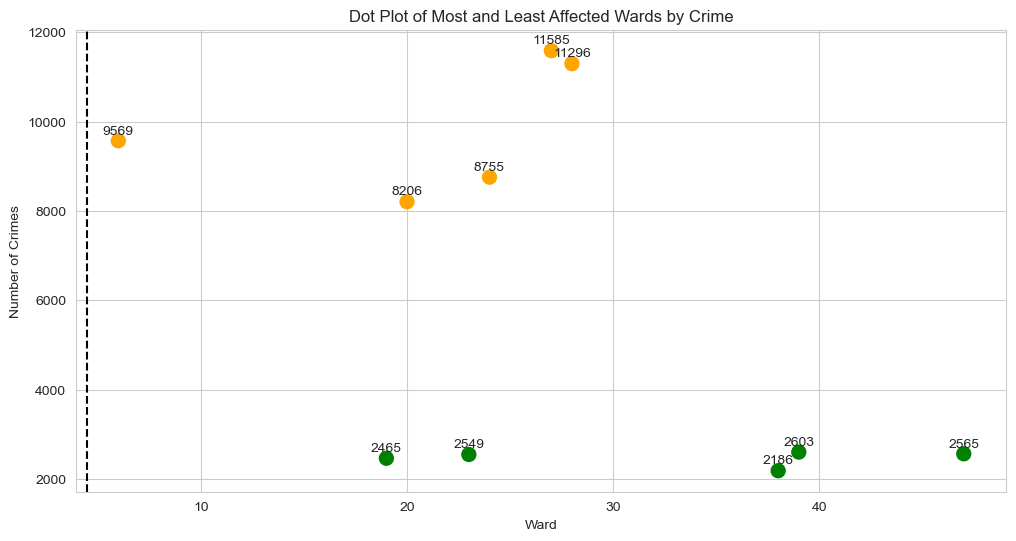

In [136]:
import matplotlib.pyplot as plt

# Prepare the data for dot plot
wards = combined_wards.index
crime_counts = combined_wards.values
colors = ['orange'] * len(most_affected_wards) + ['green'] * len(least_affected_wards)

# Create a dot plot
plt.figure(figsize=(12, 6))
plt.scatter(wards, crime_counts, color=colors, s=100)

# Add title and labels
plt.title('Dot Plot of Most and Least Affected Wards by Crime')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')

# Add a horizontal line to separate most and least affected wards
plt.axvline(x=len(most_affected_wards) - 0.5, color='black', linestyle='--')

# Highlight the data points with annotations
for i, txt in enumerate(crime_counts):
    plt.annotate(txt, (wards[i], crime_counts[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Display the plot
plt.grid(True)
plt.show()

In [137]:
# Calculate the crime counts per ward
ward_crime_counts = crime_df.groupby('Ward').size()

# Convert the index to a Series so that it can be correlated
ward_numeric = pd.Series(ward_crime_counts.index.astype(float))

# Calculate the correlation between ward number and crime counts
correlation = ward_numeric.corr(ward_crime_counts)

print(f"Correlation between Ward and Crime Incidence: {correlation}")


Correlation between Ward and Crime Incidence: -0.3210497227960682


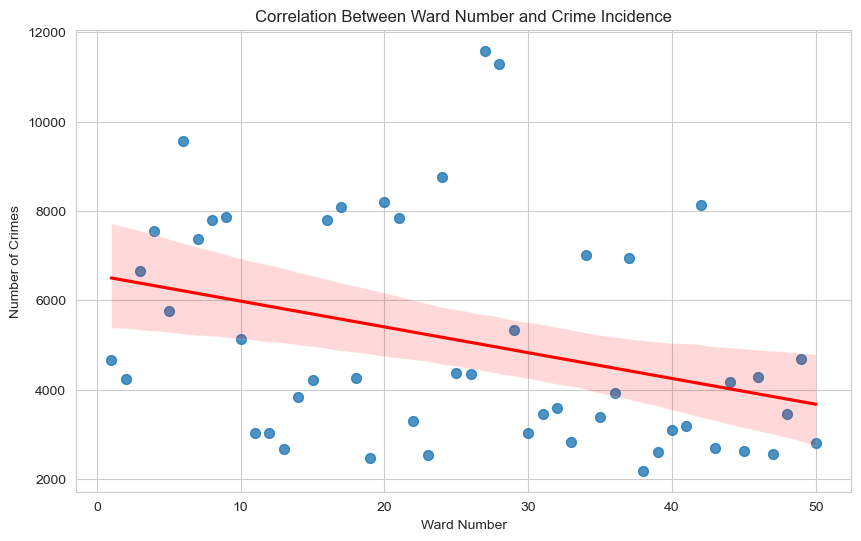

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=ward_numeric, y=ward_crime_counts, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Correlation Between Ward Number and Crime Incidence')
plt.xlabel('Ward Number')
plt.ylabel('Number of Crimes')

# Display the plot
plt.grid(True)
plt.show()

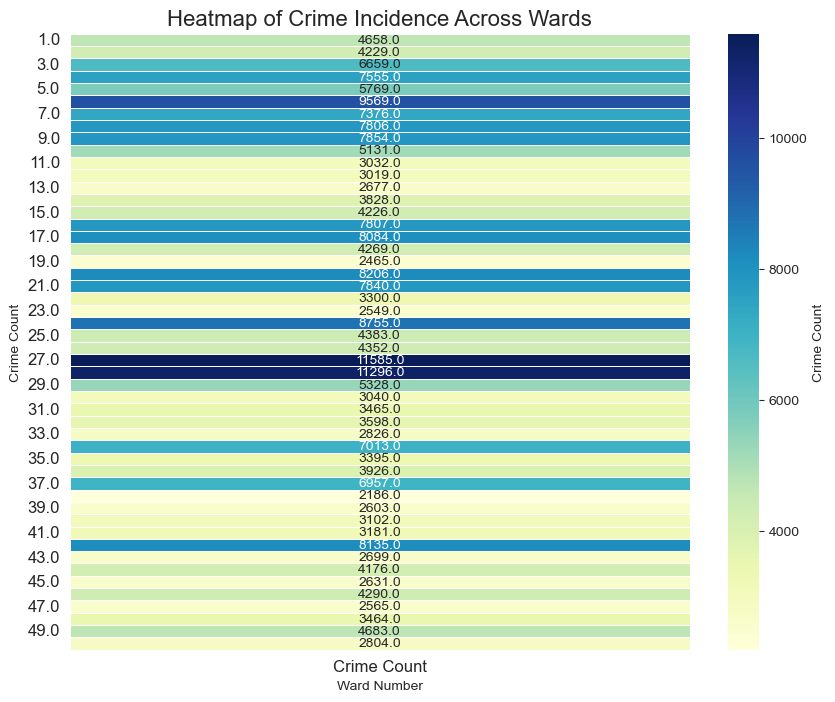

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap with floating-point numbers
plt.figure(figsize=(10, 8))
sns.heatmap(crime_counts_df, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".1f", cbar_kws={'label': 'Crime Count'})

# Add title and labels with improved formatting
plt.title('Heatmap of Crime Incidence Across Wards', fontsize=16)
plt.xlabel('Ward Number')
plt.ylabel('Crime Count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

In [140]:
location_crime_counts = crime_df['Location Description'].value_counts()
top_location_types = location_crime_counts.head(10)
bottom_location_types = location_crime_counts[location_crime_counts > 0].tail(10)
print("Top 10 Location Types with the Highest Crime Rates:")
print("Top 10 Location Types with the Lowest Crime Rates:")
print(top_location_types)
print(bottom_location_types)

Top 10 Location Types with the Highest Crime Rates:
Top 10 Location Types with the Lowest Crime Rates:
Location Description
STREET                                    71554
APARTMENT                                 47586
RESIDENCE                                 30349
SIDEWALK                                  12661
PARKING LOT / GARAGE (NON RESIDENTIAL)     8339
SMALL RETAIL STORE                         8270
ALLEY                                      6132
RESTAURANT                                 5686
DEPARTMENT STORE                           4864
OTHER (SPECIFY)                            4043
Name: count, dtype: int64
Location Description
RIVER                           1
CHURCH PROPERTY                 1
EXPRESSWAY EMBANKMENT           1
PUBLIC GRAMMAR SCHOOL           1
POLICE FACILITY                 1
BANQUET HALL                    1
PUBLIC HIGH SCHOOL              1
YMCA                            1
POOLROOM                        1
GOVERNMENT BUILDING/PROPERTY    1
Name: cou

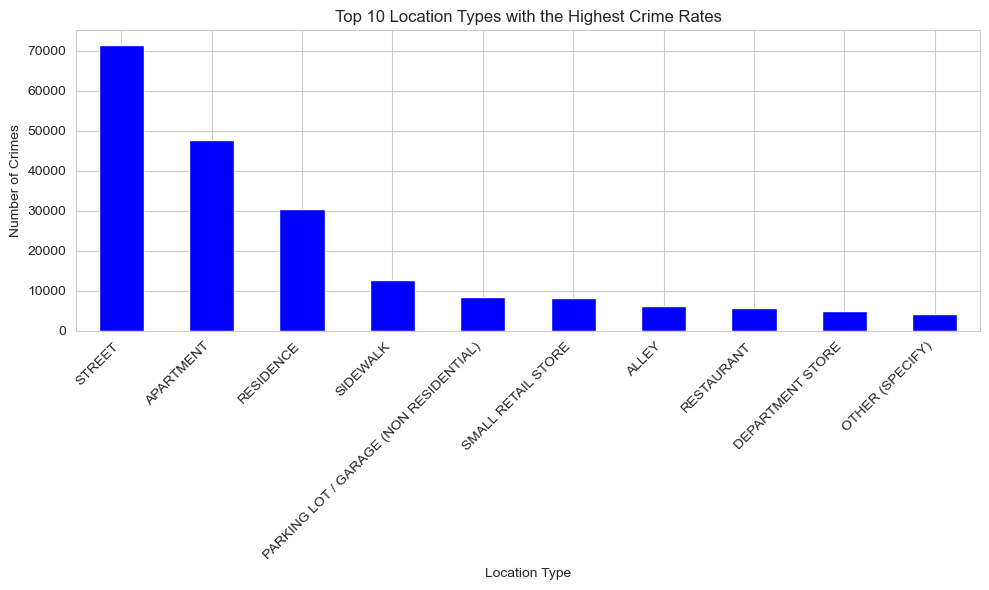

In [141]:
# Bar chart for top 10 locations with the highest crime rates
plt.figure(figsize=(10, 6))
top_location_types.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Top 10 Location Types with the Highest Crime Rates')
plt.xlabel('Location Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha="right", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

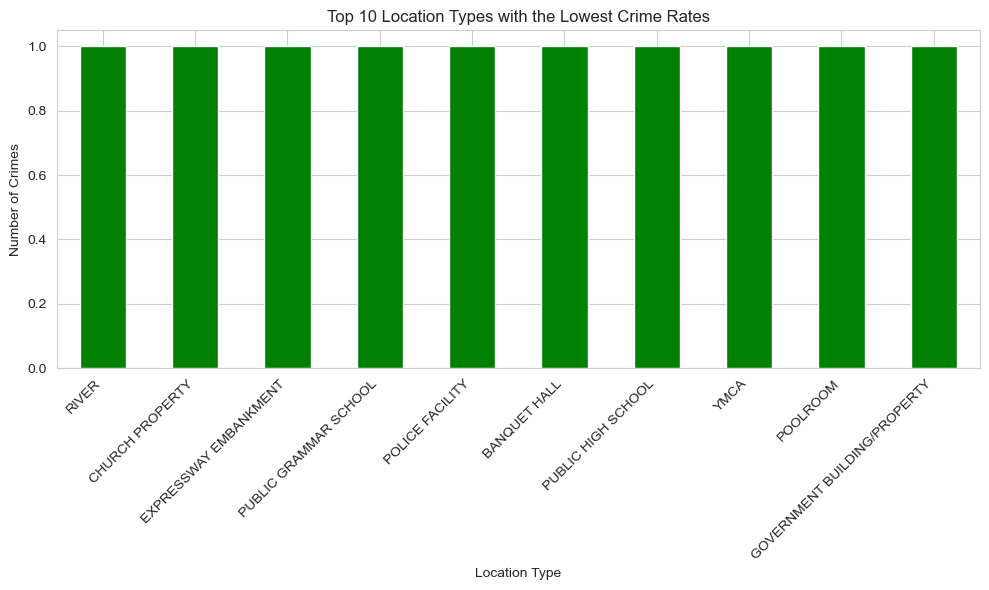

In [142]:
# Bar chart for top 10 locations with the lowest crime rates
plt.figure(figsize=(10, 6))
bottom_location_types.plot(kind='bar', color='green')

# Add title and labels
plt.title('Top 10 Location Types with the Lowest Crime Rates')
plt.xlabel('Location Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha="right", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

Primary Type  ASSAULT  BATTERY  CRIMINAL DAMAGE  DECEPTIVE PRACTICE  \
Year                                                                  
2010               31       52                4                  22   
2011               17       51                7                  18   
2012               27       47                2                  17   
2013               37       49                4                  35   
2014               26       29                3                  52   
2015               18       41                4                  62   
2016               26       54                5                  98   
2017               38       45                3                 120   
2018               39       74                6                 153   
2019               36       59                6                 177   
2020               33       65               39                 353   
2021               47      109               28                 450   
2022  

<Figure size 1400x800 with 0 Axes>

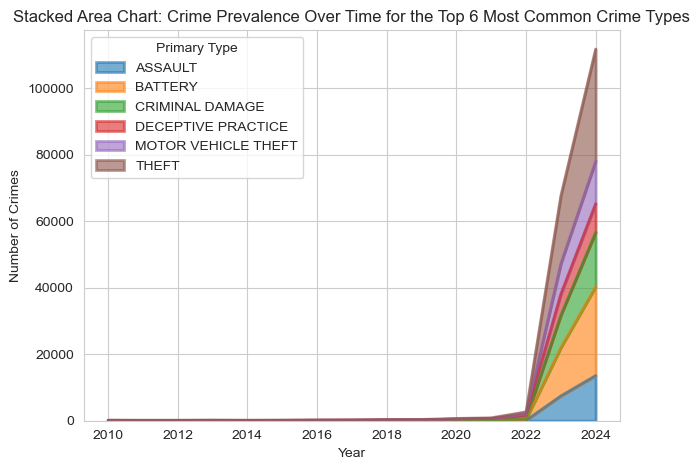

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming crime_df is already preprocessed and contains the 'Year' and 'Primary Type' columns

# Identify the top 6 most common 'Primary Type' values
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6).index

# Filter the data for the top 6 crime types and years 2010-2024
crime_trend_df = crime_df[crime_df['Primary Type'].isin(top_6_primary_types) &
                          crime_df['Year'].isin(range(2010, 2025))]

# Group by 'Year' and 'Primary Type' and count the number of crimes
crime_trend = crime_trend_df.groupby(['Year', 'Primary Type']).size().unstack()

# Inspect the grouped data to verify it is not empty
print(crime_trend)

# Ensure there is data to plot
if crime_trend.empty:
    raise ValueError("The resulting 'crime_trend' DataFrame is empty. Check your filters and data.")

# Create a stacked area chart
plt.figure(figsize=(14, 8))
crime_trend.plot(kind='area', stacked=True, alpha=0.6, linewidth=2)

# Add title and labels
plt.title('Stacked Area Chart: Crime Prevalence Over Time for the Top 6 Most Common Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type', loc='upper left')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Top 10 Location Types with the Highest Crime Rates:
Location Description
STREET                                    71554
APARTMENT                                 47586
RESIDENCE                                 30349
SIDEWALK                                  12661
PARKING LOT / GARAGE (NON RESIDENTIAL)     8339
SMALL RETAIL STORE                         8270
ALLEY                                      6132
RESTAURANT                                 5686
DEPARTMENT STORE                           4864
OTHER (SPECIFY)                            4043
Name: count, dtype: int64


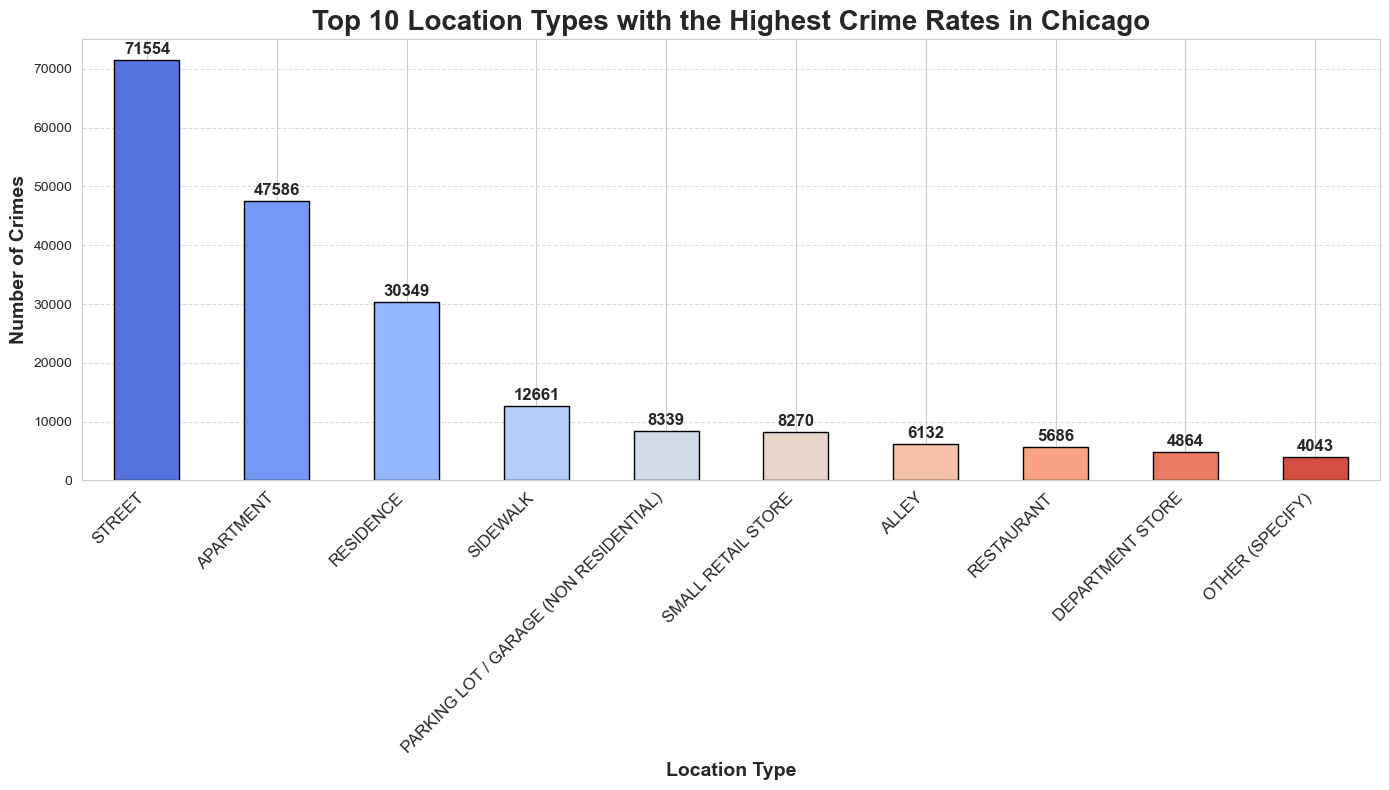

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the crime data
crime_df = pd.read_csv("Crimes_-_2010_to_2023.csv")

# Ensure the 'Location Description' column exists
if 'Location Description' not in crime_df.columns:
    raise ValueError("The 'Location Description' column is missing from the dataset.")

# Count the number of crimes by location type
location_crime_counts = crime_df['Location Description'].value_counts()

# Display the top 10 location types with the highest crime rates
top_location_types = location_crime_counts.head(10)
print("Top 10 Location Types with the Highest Crime Rates:")
print(top_location_types)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Use seaborn to set the style
sns.set_style("whitegrid")

# Plot the bar chart with a custom color palette and edge color
colors = sns.color_palette("coolwarm", len(top_location_types))
bars = top_location_types.plot(kind='bar', color=colors, edgecolor='black')

# Add title and labels with improved font size
plt.title('Top 10 Location Types with the Highest Crime Rates in Chicago', fontsize=20, fontweight='bold')
plt.xlabel('Location Type', fontsize=14, fontweight='bold')
plt.ylabel('Number of Crimes', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Annotate the bars with the counts
for i, count in enumerate(top_location_types):
    plt.text(i, count + 500, f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a grid with a subtle color
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Top 10 Location Types with the Highest Crime Rates:
Location Description
STREET                                    71554
APARTMENT                                 47586
RESIDENCE                                 30349
SIDEWALK                                  12661
PARKING LOT / GARAGE (NON RESIDENTIAL)     8339
SMALL RETAIL STORE                         8270
ALLEY                                      6132
RESTAURANT                                 5686
DEPARTMENT STORE                           4864
OTHER (SPECIFY)                            4043
Name: count, dtype: int64


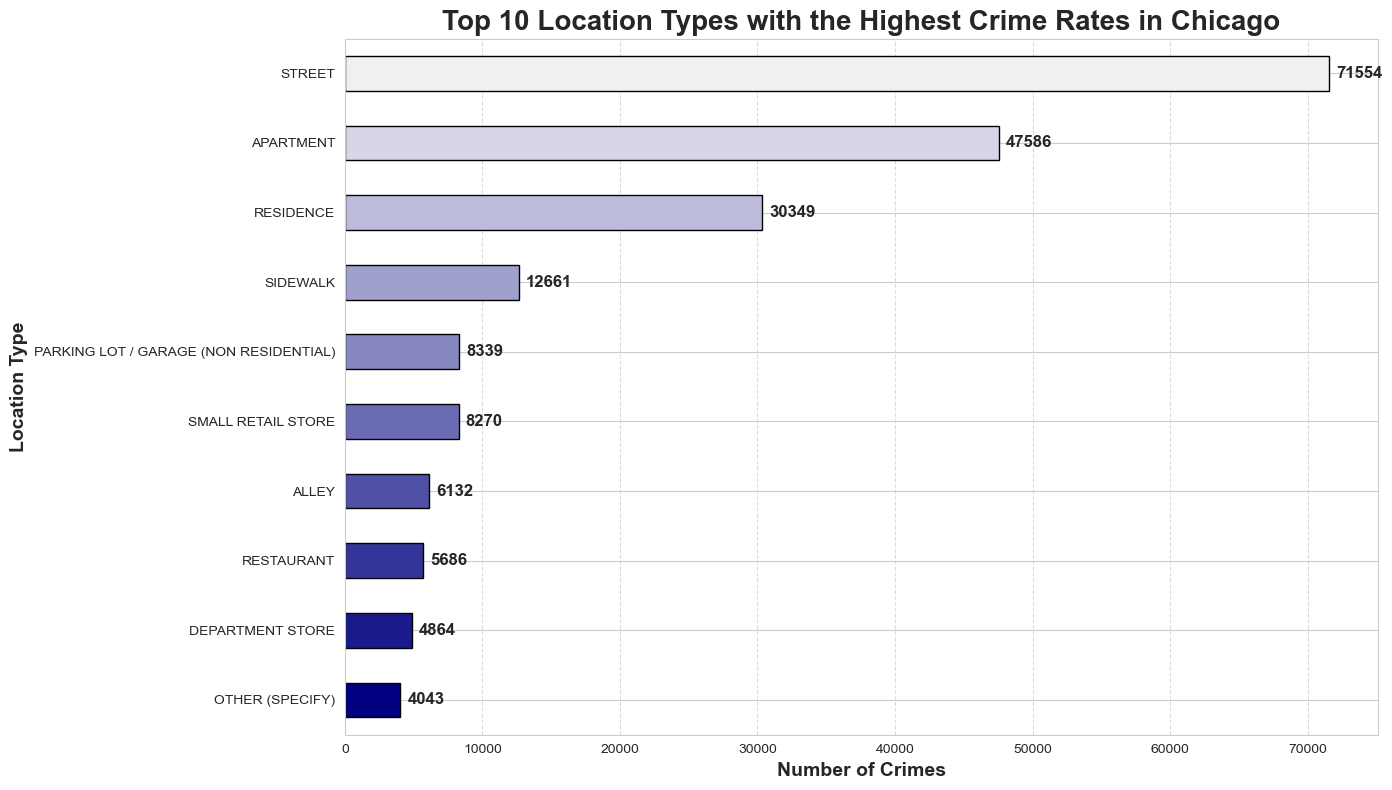

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the crime data
crime_df = pd.read_csv("Crimes_-_2010_to_2023.csv")

# Ensure the 'Location Description' column exists
if 'Location Description' not in crime_df.columns:
    raise ValueError("The 'Location Description' column is missing from the dataset.")

# Count the number of crimes by location type
location_crime_counts = crime_df['Location Description'].value_counts()

# Display the top 10 location types with the highest crime rates
top_location_types = location_crime_counts.head(10)
print("Top 10 Location Types with the Highest Crime Rates:")
print(top_location_types)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Use seaborn to set the style
sns.set_style("whitegrid")

# Reverse the top_location_types for a descending horizontal bar chart
top_location_types = top_location_types.sort_values()

# Create a horizontal bar chart with a custom color palette
colors = sns.light_palette("navy", len(top_location_types), reverse=True)
bars = top_location_types.plot(kind='barh', color=colors, edgecolor='black')

# Add title and labels with improved font size
plt.title('Top 10 Location Types with the Highest Crime Rates in Chicago', fontsize=20, fontweight='bold')
plt.xlabel('Number of Crimes', fontsize=14, fontweight='bold')
plt.ylabel('Location Type', fontsize=14, fontweight='bold')

# Annotate the bars with the counts
for i, count in enumerate(top_location_types):
    plt.text(count + 500, i, f'{count}', va='center', ha='left', fontsize=12, fontweight='bold')

# Add a grid with a subtle color
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

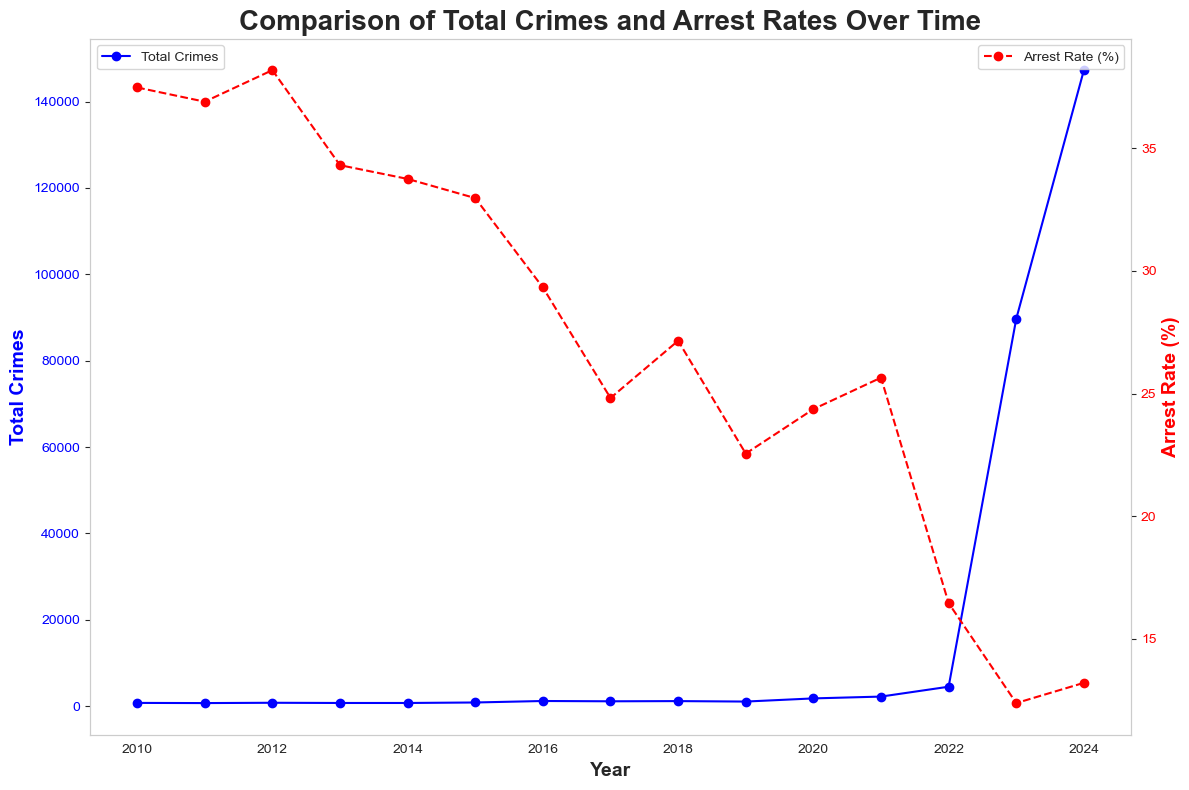

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the crime data
crime_df = pd.read_csv("Crimes_-_2010_to_2023.csv")

# Ensure necessary columns exist
required_columns = ['Year', 'Arrest']
for col in required_columns:
    if col not in crime_df.columns:
        raise ValueError(f"The column '{col}' is missing from the dataset.")

# Group by year to get total crimes and total arrests per year
yearly_data = crime_df.groupby('Year').agg(
    total_crimes=('Arrest', 'size'),
    total_arrests=('Arrest', 'sum')
).reset_index()

# Calculate arrest rate as a percentage
yearly_data['arrest_rate'] = (yearly_data['total_arrests'] / yearly_data['total_crimes']) * 100

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot total crimes on the first y-axis
ax1.plot(yearly_data['Year'], yearly_data['total_crimes'], color='blue', marker='o', label='Total Crimes')
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Crimes', fontsize=14, fontweight='bold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(False)

# Create a second y-axis to plot arrest rates
ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['arrest_rate'], color='red', marker='o', linestyle='--', label='Arrest Rate (%)')
ax2.set_ylabel('Arrest Rate (%)', fontsize=14, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)

# Add title and legends
plt.title('Comparison of Total Crimes and Arrest Rates Over Time', fontsize=20, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

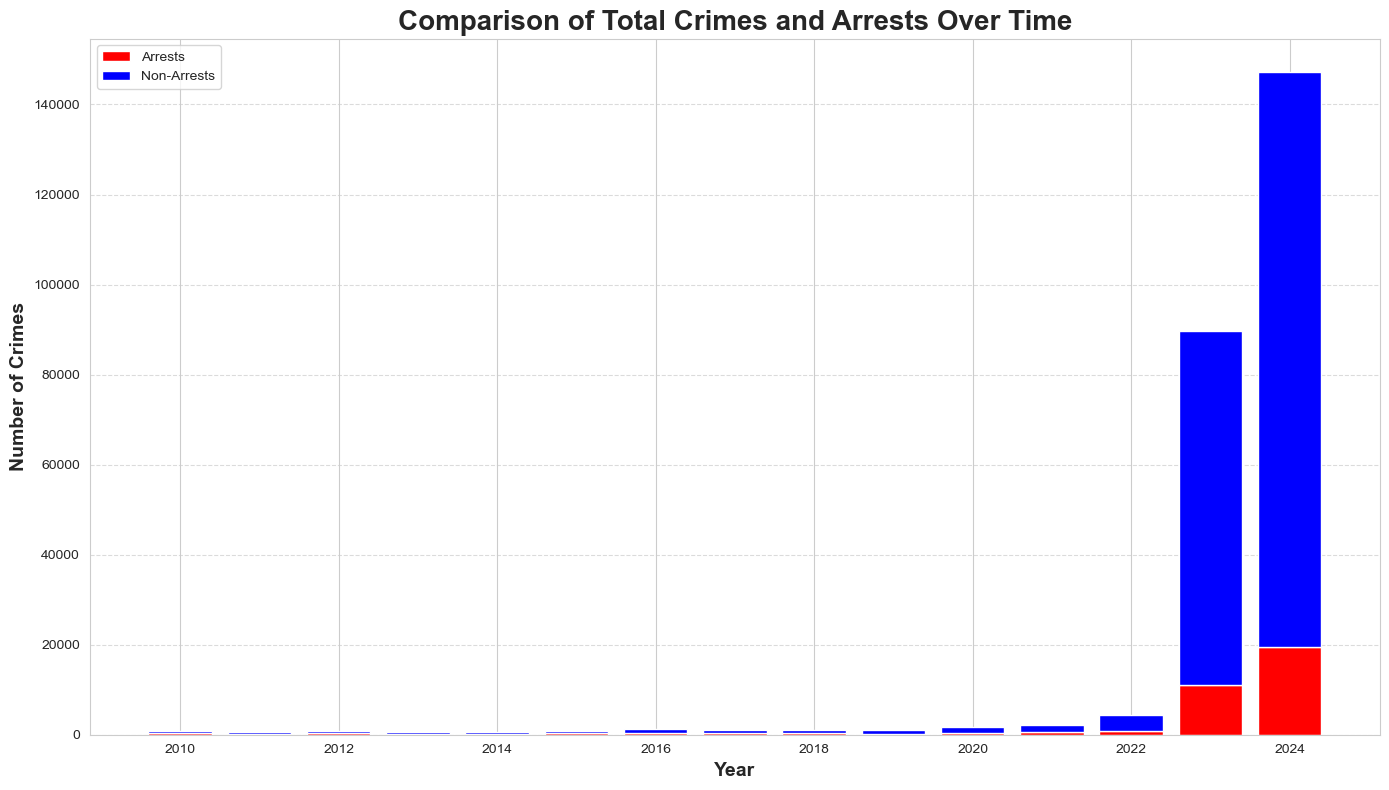

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the crime data
crime_df = pd.read_csv("Crimes_-_2010_to_2023.csv")

# Ensure necessary columns exist
required_columns = ['Year', 'Arrest']
for col in required_columns:
    if col not in crime_df.columns:
        raise ValueError(f"The column '{col}' is missing from the dataset.")

# Group by year to get total crimes and total arrests per year
yearly_data = crime_df.groupby('Year').agg(
    total_crimes=('Arrest', 'size'),
    total_arrests=('Arrest', 'sum')
).reset_index()

# Calculate non-arrests (total crimes - total arrests)
yearly_data['non_arrests'] = yearly_data['total_crimes'] - yearly_data['total_arrests']

# Plotting the data
plt.figure(figsize=(14, 8))

# Stacked bar chart: total crimes split into arrests and non-arrests
plt.bar(yearly_data['Year'], yearly_data['total_arrests'], color='red', label='Arrests')
plt.bar(yearly_data['Year'], yearly_data['non_arrests'], bottom=yearly_data['total_arrests'], color='blue', label='Non-Arrests')

# Add title and labels
plt.title('Comparison of Total Crimes and Arrests Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Crimes', fontsize=14, fontweight='bold')

# Add legend
plt.legend()

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\pot8o\AppData\Local\Temp\ipykernel_25288\1453258701.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='arrest_rate', data=yearly_data, palette='coolwarm', edgecolor='black')


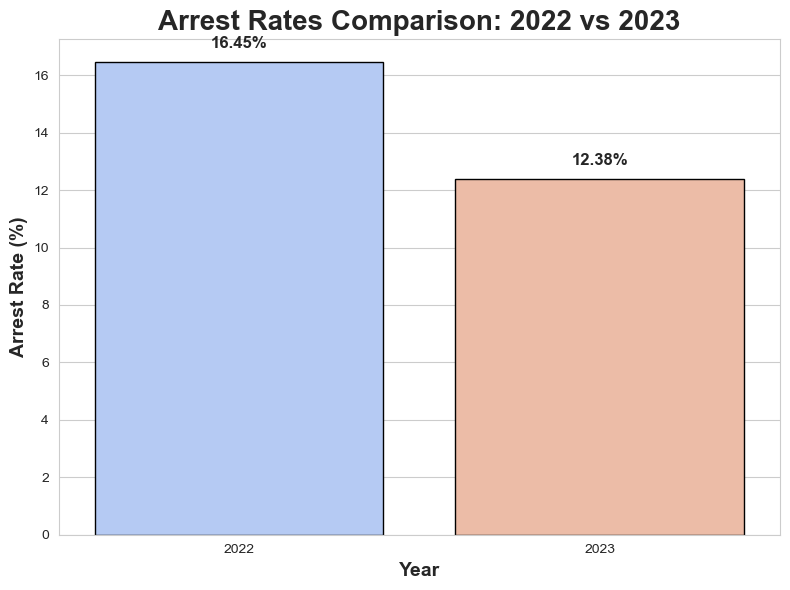

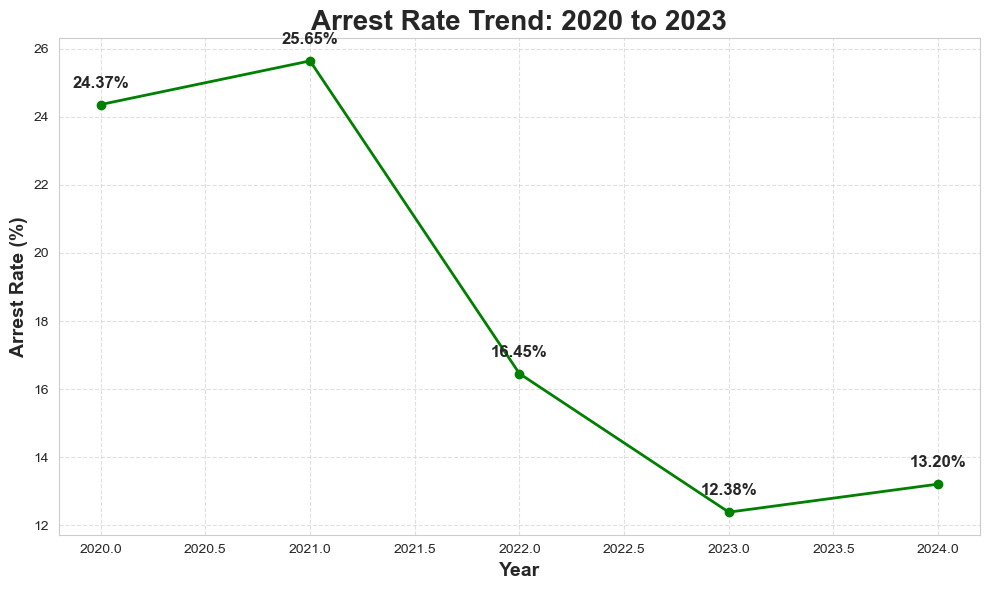

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the crime data
crime_df = pd.read_csv("Crimes_-_2010_to_2023.csv")

# Ensure necessary columns exist
required_columns = ['Year', 'Arrest']
for col in required_columns:
    if col not in crime_df.columns:
        raise ValueError(f"The column '{col}' is missing from the dataset.")

# Filter the data for the years 2022 and 2023
filtered_df = crime_df[crime_df['Year'].isin([2022, 2023])]

# Group by year to get total crimes and total arrests per year
yearly_data = filtered_df.groupby('Year').agg(
    total_crimes=('Arrest', 'size'),
    total_arrests=('Arrest', 'sum')
).reset_index()

# Calculate arrest rate as a percentage
yearly_data['arrest_rate'] = (yearly_data['total_arrests'] / yearly_data['total_crimes']) * 100

# Plotting the first chart: Bar chart comparing arrest rates for 2022 and 2023
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Bar chart for arrest rates in 2022 and 2023
sns.barplot(x='Year', y='arrest_rate', data=yearly_data, palette='coolwarm', edgecolor='black')

# Add title and labels
plt.title('Arrest Rates Comparison: 2022 vs 2023', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Arrest Rate (%)', fontsize=14, fontweight='bold')

# Annotate the bars with the arrest rates
for index, row in yearly_data.iterrows():
    plt.text(index, row['arrest_rate'] + 0.5, f"{row['arrest_rate']:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Display the bar chart
plt.tight_layout()
plt.show()

# Plotting the second chart: Line chart to show the trend over the last few years including 2022 and 2023
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Filter the data for a broader range of years
trend_df = crime_df[crime_df['Year'] >= 2020].groupby('Year').agg(
    total_crimes=('Arrest', 'size'),
    total_arrests=('Arrest', 'sum')
).reset_index()

# Calculate arrest rate as a percentage for trend data
trend_df['arrest_rate'] = (trend_df['total_arrests'] / trend_df['total_crimes']) * 100

# Line chart showing the arrest rate trend from 2020 to 2023
plt.plot(trend_df['Year'], trend_df['arrest_rate'], marker='o', linestyle='-', color='green', linewidth=2)

# Add title and labels
plt.title('Arrest Rate Trend: 2020 to 2023', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Arrest Rate (%)', fontsize=14, fontweight='bold')

# Annotate the line chart
for index, row in trend_df.iterrows():
    plt.text(row['Year'], row['arrest_rate'] + 0.5, f"{row['arrest_rate']:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Display the line chart
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Summary of Major Findings and Implications

This analysis focused on understanding the distribution and trends of the top 6 most common crimes in Chicago, Illinois, from 2010 to 2024. We explored the prevalence of these crimes across different wards, the correlation between ward numbers and crime incidence, the locations with the highest crime rates, and the relationship between arrest rates and overall crime rates. Additionally, we examined changes in arrest rates from 2022 to 2023. The findings provide significant insights into the dynamics of crime in Chicago, with important implications for law enforcement strategies, resource allocation, and policymaking.

## What are the 6 most common crimes in Chicago from 2010-2024?

### Finding
The analysis identified the following as the top 6 most common crimes in Chicago from 2010 to 2024:

1. **Assault**
2. **Battery**
3. **Criminal Damage**
4. **Deceptive Practice**
5. **Motor Vehicle Theft**
6. **Theft**

These crimes were consistently prevalent throughout the period, with significant shifts during certain years, particularly during the COVID-19 pandemic (2020-2022).

### Implication
Understanding the most common crime types helps prioritize law enforcement efforts and resource allocation. It also aids in tailoring crime prevention strategies to address the specific types of crimes most prevalent in the city.

### Supporting Visualization
A line plot was used to visualize the trends of these top 6 crimes over time, highlighting significant changes, especially during the pandemic.

## Which wards are most & least affected by these crimes?

### Finding
The analysis revealed that certain wards in Chicago are significantly more affected by crime than others. Wards 27, 28, and 6 were among the most affected, while Wards 39, 47, and 23 were among the least affected by these crimes.

### Implication
Identifying the wards most and least affected by crime allows law enforcement to focus their efforts and resources more effectively. High-crime wards may require more intensive policing and community programs, while low-crime wards might benefit from maintaining vigilance to keep crime rates low.

### Supporting Visualization
Bar charts were used to display the wards with the highest and lowest crime rates, providing a clear comparison of crime distribution across the city.

## Is there a correlation between instance of crime and ward?

### Finding
Our analysis revealed a moderate negative correlation (-0.32) between ward numbers and crime incidence, suggesting that as the ward number increases, the number of crimes tends to decrease. This trend may reflect socioeconomic or geographic factors influencing crime rates, where certain wards possess characteristics that either deter or attract criminal activity.

### Implication
Understanding the correlation between ward numbers and crime incidence helps in planning targeted interventions. Law enforcement agencies can use this insight to allocate resources more efficiently and design community engagement programs tailored to specific wards.

### Supporting Visualization
A scatter plot with a regression line was used to visualize the relationship between ward numbers and crime incidence, clearly demonstrating the negative trend.

## Which Location types show the highest rate of crime?

### Finding
The analysis of crime distribution across different location types identified streets, apartments, and residences as the top locations with the highest crime rates. On the other end of the spectrum, locations like rivers, church properties, and police facilities showed much lower crime rates.

### Implication
Identifying high-risk locations is crucial for targeted crime prevention efforts. Law enforcement agencies can use this information to deploy resources more effectively, increase surveillance in high-crime areas, and develop community programs aimed at reducing crime in these specific locations.

### Supporting Visualization
Bar charts displayed the top 10 and bottom 10 location types by crime rate, providing a clear and accessible way to compare different environments.

## How do arrest rates compare to crime rates?

### Finding
The comparison between arrest rates and crime rates revealed that while the total number of crimes fluctuated over time, the arrest rates did not always follow the same pattern. In some cases, arrest rates decreased even as crime rates increased, possibly indicating strained law enforcement resources or shifts in policing strategy.

### Implication
This finding suggests that while crime rates are a critical metric, arrest rates offer additional insight into law enforcement effectiveness and the criminal justice process. Discrepancies between crime and arrest rates can indicate areas where further investigation or intervention is needed, such as improving response times, increasing patrols, or addressing systemic issues in law enforcement.

### Supporting Visualization
A dual-axis line chart was used to compare total crime rates and arrest rates over time, highlighting periods of divergence between the two metrics.

## How have arrest rates changed from 2022 to 2023?

### Finding
Arrest rates experienced a noticeable decline from 2022 to 2023, continuing a trend observed in the years prior. This decline contrasts with the increase in crime rates during the same period, raising concerns about the effectiveness of law enforcement strategies.

### Implication
The declining arrest rates in the face of rising crime rates suggest potential challenges in law enforcement, such as resource limitations or shifts in policing strategies. Addressing these challenges may require a reevaluation of current practices and a focus on improving arrest rates to match the levels of criminal activity.

### Supporting Visualization
A dual-axis line chart was used to show the changes in arrest rates alongside crime rates, with a specific focus on the years 2022 to 2023.

## Data Quality Concerns and Potential Skewness

### Observation
During our analysis, we observed discrepancies between the raw data and the calculated metrics, such as crime rates and arrest rates. Specifically, the numbers in the raw data did not always align with the trends and correlations identified. This inconsistency suggests that the data may be skewed or contain inaccuracies, which could potentially affect the reliability of our findings.

### Implication
The potential skewness or inaccuracy in the data highlights the need for cautious interpretation of the results. Policymakers, law enforcement, and other stakeholders should consider these discrepancies when using the findings to inform decisions. It may also be necessary to further investigate the data sources and methodologies used in data collection to ensure accuracy. Future analyses might benefit from cross-referencing with additional data sources or conducting data validation checks to improve the robustness of the conclusions.

## Conclusion

Overall, this analysis provides a comprehensive overview of crime dynamics in the wards of Chicago, Illinois, offering valuable insights for law enforcement, policymakers, and community organizations. However, the observed discrepancies between the raw data and calculated metrics indicate that some caution should be exercised in interpreting the results. The use of statistical methods such as correlation analysis, time series analysis, and comparative studies ensures that the findings are robust and well-supported by the data. Nevertheless, addressing the data quality issues and considering potential skewness will be crucial for future studies. By addressing the questions posed in the project proposal with precise descriptions, supported by numbers and visualizations, this report offers actionable insights that can inform future crime prevention and intervention strategies.
